In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


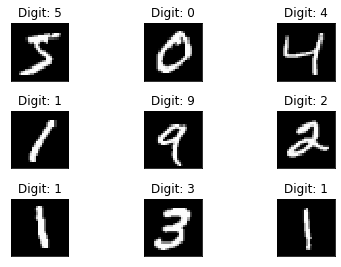

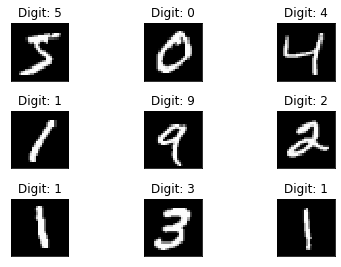

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
#defining the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.16170146,  0.29748684,  0.44302022,  0.47989646,  0.05508004,
         0.13142551,  0.29932085, -0.39883503, -0.28596872, -0.14412114]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.10195681, 0.116785  , 0.13508013, 0.14015435, 0.09164551,
        0.09891623, 0.1169994 , 0.05820742, 0.06516217, 0.07509296]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.3134818

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1424 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1088 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0755 - accuracy: 0.9765


In [28]:
#saving metrices in history
import os
save_dir = "/content/drive/My Drive/mnsitModel"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/mnsitModel/keras_mnist.h5 


In [29]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0748 - accuracy: 0.9768


[0.07480231672525406, 0.9768000245094299]

In [32]:
#load the model and create prediction on test set
from keras.models import load_model
mnist_model = load_model('/content/drive/My Drive/mnsitModel/keras_mnist.h5')
predicted_classes = mnist_model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



9768  classified correctly
232  classified incorrectly


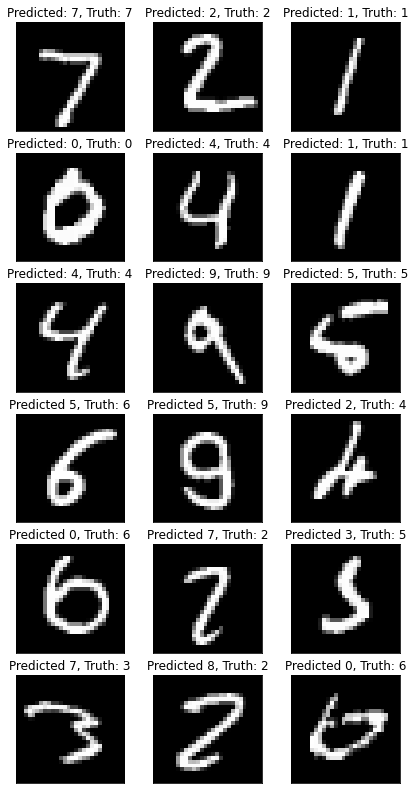

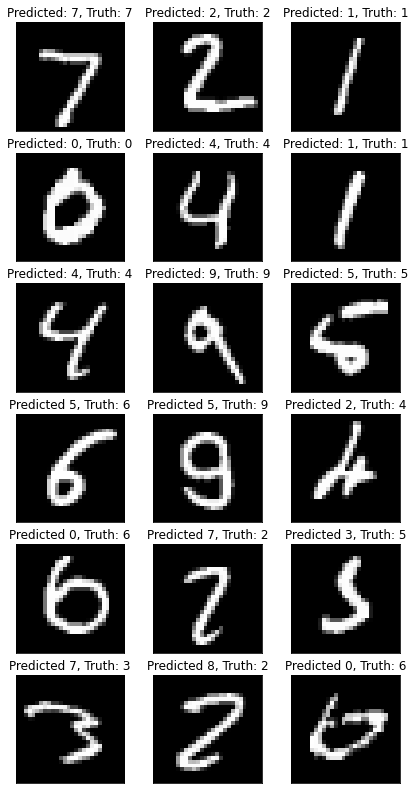

In [35]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.2259877e-14, 7.3802582e-15, 2.7030321e-11, 1.1590256e-06,
        1.1382197e-16, 3.3808527e-13, 1.7271317e-22, 9.9999881e-01,
        2.0003335e-12, 2.0294049e-09],
       [1.1689712e-15, 4.2288026e-12, 1.0000000e+00, 1.5074552e-12,
        2.5106557e-22, 9.5446790e-14, 4.1951536e-14, 3.1098370e-24,
        4.1491146e-12, 1.5634123e-26],
       [9.3708819e-13, 9.9999261e-01, 1.7925805e-08, 8.3414511e-11,
        4.5753065e-08, 7.4765616e-10, 4.2070725e-09, 6.9557759e-06,
        3.1195839e-07, 2.3739557e-11],
       [1.0000000e+00, 1.2660265e-12, 5.4121376e-08, 1.0567804e-12,
        6.5087141e-12, 1.6062188e-11, 4.7414828e-09, 2.1189657e-09,
        2.7790869e-13, 2.6426794e-09],
       [1.1544759e-11, 4.6186490e-18, 8.5867077e-11, 2.6009310e-12,
        9.9991429e-01, 1.0929686e-12, 1.5234934e-10, 2.4163205e-08,
        4.0832141e-13, 8.5761436e-05]], dtype=float32)>